## Exercise - DL Tutorial 06

### student names: Anastasia Karsten, Pavlo Mospan

Submit you solution by 25 May to manuel.milling@informatik.uni-augsburg.de AND maurice.gerczuk@informatik.uni-augsburg.de

In [2]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import numpy as np

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

Load MNIST data like in tutorial 3.

In [3]:
from tensorflow.keras.datasets import mnist
num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print('x_train shape:\t', x_train.shape)
print('y_train shape:\t', y_train.shape)
print('x_test shape:\t', x_test.shape)
print('y_test shape:\t', y_test.shape)

x_train shape:	 (60000, 784)
y_train shape:	 (60000,)
x_test shape:	 (10000, 784)
y_test shape:	 (10000,)


Create one-hot target labels for the TensorFlow model.

In [4]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### 2. Implement model with Sequential API

Define model.

In [5]:
model = tf.keras.Sequential()

model.add(Dense(400, input_shape=(784, ), activation="sigmoid"))
model.add(Dense(400, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])

Train model.

In [6]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 1.1405 - accuracy: 0.6446
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4138 - accuracy: 0.8811
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3464 - accuracy: 0.8992
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3167 - accuracy: 0.9075
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2970 - accuracy: 0.9137


Evaluate model.

In [7]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.2810 - accuracy: 0.9170


[0.28096386790275574, 0.9169999957084656]

### 3. Implement model with functional API

Define model.

In [8]:
inputs = Input(shape=(784, ))

x = inputs
x = Dense(400, input_shape=(784, ), activation="sigmoid")(x)
x = Dense(400, activation="sigmoid")(x)
outputs = Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 478,410
Trainable params: 478,410
Non-trainable params: 0
_________________________________________________________________


Train model

In [9]:
model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 1.1361 - accuracy: 0.6451
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.4117 - accuracy: 0.8817
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3457 - accuracy: 0.8991
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3158 - accuracy: 0.9076
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.2970 - accuracy: 0.9135


Evaluate Model

In [10]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.9160


[0.28503620624542236, 0.9160000085830688]

### 4. Train model with validation split for 20 epochs

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)
history = model.history

Epoch 1/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2885 - accuracy: 0.9158 - val_loss: 0.2566 - val_accuracy: 0.9267
Epoch 2/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2756 - accuracy: 0.9203 - val_loss: 0.2591 - val_accuracy: 0.9252
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2639 - accuracy: 0.9228 - val_loss: 0.2407 - val_accuracy: 0.9308
Epoch 4/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2537 - accuracy: 0.9258 - val_loss: 0.2414 - val_accuracy: 0.9301
Epoch 5/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2436 - accuracy: 0.9296 - val_loss: 0.2236 - val_accuracy: 0.9362
Epoch 6/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2330 - accuracy: 0.9317 - val_loss: 0.2154 - val_accuracy: 0.9392
Epoch 7/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2227 - accuracy: 0.9345 - val_loss: 0.2094 - val_accuracy: 0.9408
Epoch 

Plot training progress.

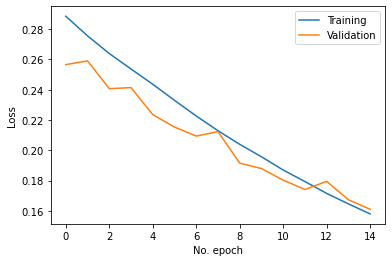

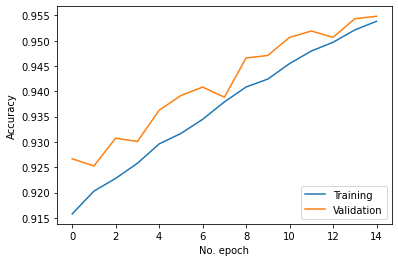

In [12]:
p = plt.figure(1)
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")

p2 = plt.figure(2)
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")

plt.show()



### 5/6. Improve Test result to > 98%

Define model.

In [13]:
model = tf.keras.Sequential()

model.add(Dense(400, input_shape=(784, ), activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

Train model.

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
history = model.history

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2145 - accuracy: 0.9333 - val_loss: 0.1226 - val_accuracy: 0.9607
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 0.0950 - val_accuracy: 0.9719
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.1042 - val_accuracy: 0.9705
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0958 - val_accuracy: 0.9746
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.1061 - val_accuracy: 0.9750
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0947 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0956 - val_accuracy:

Plot training progress.

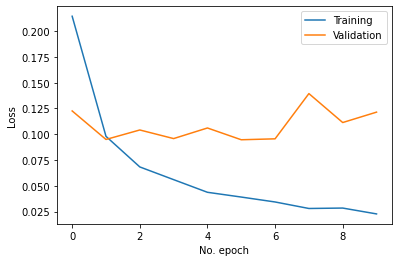

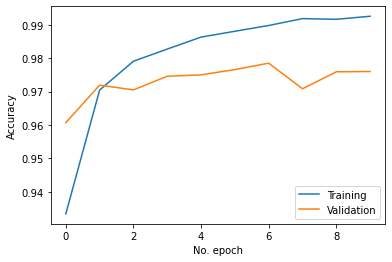

In [15]:
p = plt.figure(1)
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")

p2 = plt.figure(2)
plt.plot(history.history['accuracy'], label="Training")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")

plt.show()

Evaluate model.

In [16]:
model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0999 - accuracy: 0.9808


[0.09985888004302979, 0.9807999730110168]